In [2]:
import os
import pandas as pd

In [3]:
results = pd.read_json(os.path.join('data','ergast-results.json'))

In [4]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'code', 'forename',
       'surname', 'dob', 'nationality', 'driverUrl', 'year', 'round', 'date',
       'quali_date', 'quali_time', 'location', 'country', 'gp', 'status',
       'constructor', 'constructorNationality', 'constructorRef', 'name',
       'age'],
      dtype='object')

## From what grid places did the top 3 finishers start?

In [5]:
podiums = results[results['position'].isin([1,2,3])]

In [6]:
podiums.groupby('year')['grid'].mean().nsmallest(6)

year
2015.0    2.807018
2007.0    2.882353
2010.0    2.929825
2002.0    3.019608
1993.0    3.104167
2011.0    3.122807
Name: grid, dtype: float64

In [7]:
podiums.groupby('year')['grid'].mean().nlargest(6)

year
1956.0    7.620690
1968.0    6.472222
1960.0    6.258065
1982.0    6.145833
1957.0    5.880000
1983.0    5.795455
Name: grid, dtype: float64

<Axes: xlabel='year'>

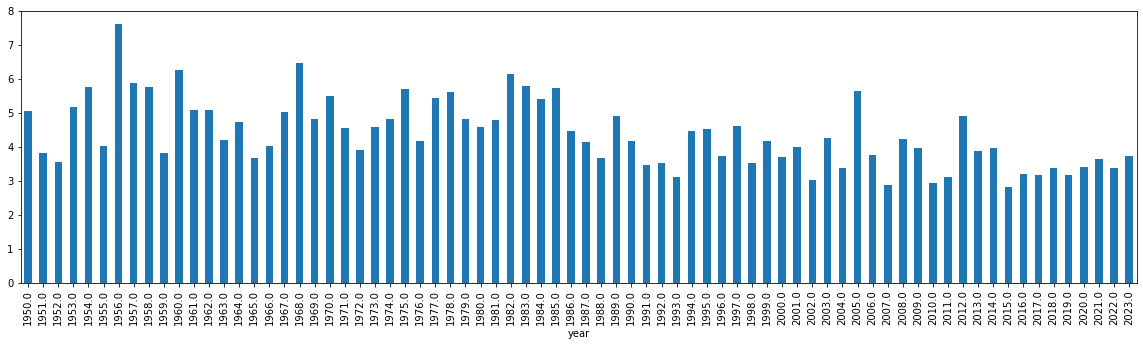

In [8]:
podiums.groupby('year')['grid'].mean().plot.bar(figsize=(20,5))

## Crashes (DNF-level) per race

In [9]:
crashes = ["Accident", "Collision", "Fatal accident", "Collision damage", "Spun off", "Front wing","Debris","Tyre puncture","Broken wing","Fire","Engine fire"]

In [10]:
results['status'].drop_duplicates().to_list()

['Finished',
 '+1 Lap',
 'Engine',
 'Collision',
 'Accident',
 'Transmission',
 'Clutch',
 'Electrical',
 'Hydraulics',
 'Disqualified',
 '+2 Laps',
 'Spun off',
 'Gearbox',
 'Radiator',
 'Suspension',
 '+4 Laps',
 'Brakes',
 '+3 Laps',
 'Overheating',
 'Tyre',
 'Puncture',
 'Driveshaft',
 'Fuel pressure',
 'Retired',
 'Wheel',
 'Throttle',
 'Steering',
 'Differential',
 'Oil pressure',
 'Withdrew',
 'Oil leak',
 'Injured',
 'Out of fuel',
 '+5 Laps',
 'Fuel pump',
 'Exhaust',
 '+6 Laps',
 '+9 Laps',
 'Rear wing',
 'Water leak',
 'Did not qualify',
 'Wheel nut',
 'Heat shield fire',
 'Vibrations',
 'Alternator',
 'Collision damage',
 'Fuel system',
 'Pneumatics',
 'ERS',
 '+8 Laps',
 'Power Unit',
 'Turbo',
 'Power loss',
 'Battery',
 'Water pump',
 'Fuel leak',
 'Wheel rim',
 '+7 Laps',
 'Not classified',
 'Handling',
 'Ignition',
 'Stalled',
 'Wheel bearing',
 'Did not prequalify',
 'Injection',
 'Distributor',
 'Technical',
 'Mechanical',
 'Front wing',
 'Electronics',
 'Engine misf

<Axes: xlabel='year'>

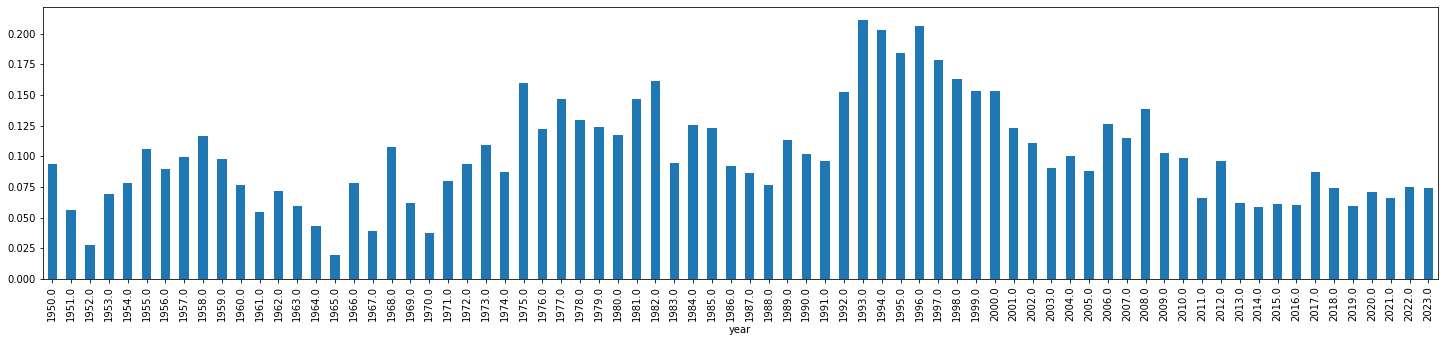

In [11]:
(results[results['status'].isin(crashes)].groupby('year')['resultId'].nunique() / results.groupby('year')['resultId'].nunique()).plot.bar(figsize=(25,5))

## From zero to hero

In [12]:
laps = pd.read_csv(os.path.join('data_raw','lap_times.csv'))

In [13]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'code', 'forename',
       'surname', 'dob', 'nationality', 'driverUrl', 'year', 'round', 'date',
       'quali_date', 'quali_time', 'location', 'country', 'gp', 'status',
       'constructor', 'constructorNationality', 'constructorRef', 'name',
       'age'],
      dtype='object')

In [14]:
laps = laps.merge(results[['raceId','driverId','laps','year','round','gp','name','constructor','status']], on=['raceId','driverId'])

In [15]:
laps

,raceId,driverId,lap,position,time,milliseconds,laps,year,round,gp,name,constructor,status
0,841,20,1,1,1:38.109,98109,58.0,2011.0,1.0,Australian Grand Prix,Sebastian Vettel,Red Bull,Finished
1,841,20,2,1,1:33.006,93006,58.0,2011.0,1.0,Australian Grand Prix,Sebastian Vettel,Red Bull,Finished
2,841,20,3,1,1:32.713,92713,58.0,2011.0,1.0,Australian Grand Prix,Sebastian Vettel,Red Bull,Finished
3,841,20,4,1,1:32.803,92803,58.0,2011.0,1.0,Australian Grand Prix,Sebastian Vettel,Red Bull,Finished
4,841,20,5,1,1:32.342,92342,58.0,2011.0,1.0,Australian Grand Prix,Sebastian Vettel,Red Bull,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558784,1117,848,54,9,1:23.608,83608,71.0,2023.0,19.0,Mexico City Grand Prix,Alexander Albon,Williams,Finished
558785,1117,848,55,9,1:24.033,84033,71.0,2023.0,19.0,Mexico City Grand Prix,Alexander Albon,Williams,Finished
558786,1117,848,56,9,1:23.568,83568,71.0,2023.0,19.0,Mexico City Grand Prix,Alexander Albon,Williams,Finished
558787,1117,848,57,9,1:23.236,83236,71.0,2023.0,19.0,Mexico City Grand Prix,Alexander Albon,Williams,Finished


In [16]:
total_laps = pd.Series(laps.groupby('raceId')['lap'].max(), name="totalLaps")

In [17]:
laps = laps.merge(total_laps, on='raceId')

In [18]:
laps

,raceId,driverId,lap,position,time,milliseconds,laps,year,round,gp,name,constructor,status,totalLaps
0,841,20,1,1,1:38.109,98109,58.0,2011.0,1.0,Australian Grand Prix,Sebastian Vettel,Red Bull,Finished,58
1,841,20,2,1,1:33.006,93006,58.0,2011.0,1.0,Australian Grand Prix,Sebastian Vettel,Red Bull,Finished,58
2,841,20,3,1,1:32.713,92713,58.0,2011.0,1.0,Australian Grand Prix,Sebastian Vettel,Red Bull,Finished,58
3,841,20,4,1,1:32.803,92803,58.0,2011.0,1.0,Australian Grand Prix,Sebastian Vettel,Red Bull,Finished,58
4,841,20,5,1,1:32.342,92342,58.0,2011.0,1.0,Australian Grand Prix,Sebastian Vettel,Red Bull,Finished,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558784,1117,848,54,9,1:23.608,83608,71.0,2023.0,19.0,Mexico City Grand Prix,Alexander Albon,Williams,Finished,71
558785,1117,848,55,9,1:24.033,84033,71.0,2023.0,19.0,Mexico City Grand Prix,Alexander Albon,Williams,Finished,71
558786,1117,848,56,9,1:23.568,83568,71.0,2023.0,19.0,Mexico City Grand Prix,Alexander Albon,Williams,Finished,71
558787,1117,848,57,9,1:23.236,83236,71.0,2023.0,19.0,Mexico City Grand Prix,Alexander Albon,Williams,Finished,71


In [19]:
fromzerotohero = laps[((laps['lap'] == laps['laps']) | (laps['lap'] == laps['laps'] -1 )) & (laps['position'] == 1) & (laps['laps'] < laps['totalLaps'])].drop(columns=['lap','time','milliseconds']).drop_duplicates()

In [20]:
fromzerotohero

,raceId,driverId,position,laps,year,round,gp,name,constructor,status,totalLaps
33275,867,20,1,33.0,2012.0,8.0,European Grand Prix,Sebastian Vettel,Red Bull,Gearbox,57
40781,873,1,1,22.0,2012.0,14.0,Singapore Grand Prix,Lewis Hamilton,McLaren,Gearbox,59
45640,877,1,1,19.0,2012.0,18.0,Abu Dhabi Grand Prix,Lewis Hamilton,McLaren,Electrical,55
48008,879,1,1,54.0,2012.0,20.0,Brazilian Grand Prix,Lewis Hamilton,McLaren,Collision,71
58196,887,20,1,41.0,2013.0,8.0,British Grand Prix,Sebastian Vettel,Red Bull,Gearbox,52
...,...,...,...,...,...,...,...,...,...,...,...
465786,1025,20,1,26.0,2019.0,16.0,Russian Grand Prix,Sebastian Vettel,Ferrari,Power loss,53
497107,1057,830,1,45.0,2021.0,6.0,Azerbaijan Grand Prix,Max Verstappen,Red Bull,Accident,51
505071,1065,1,1,25.0,2021.0,14.0,Italian Grand Prix,Lewis Hamilton,Mercedes,Collision,53
519784,1079,844,1,27.0,2022.0,6.0,Spanish Grand Prix,Charles Leclerc,Ferrari,Turbo,66


<Axes: xlabel='year'>

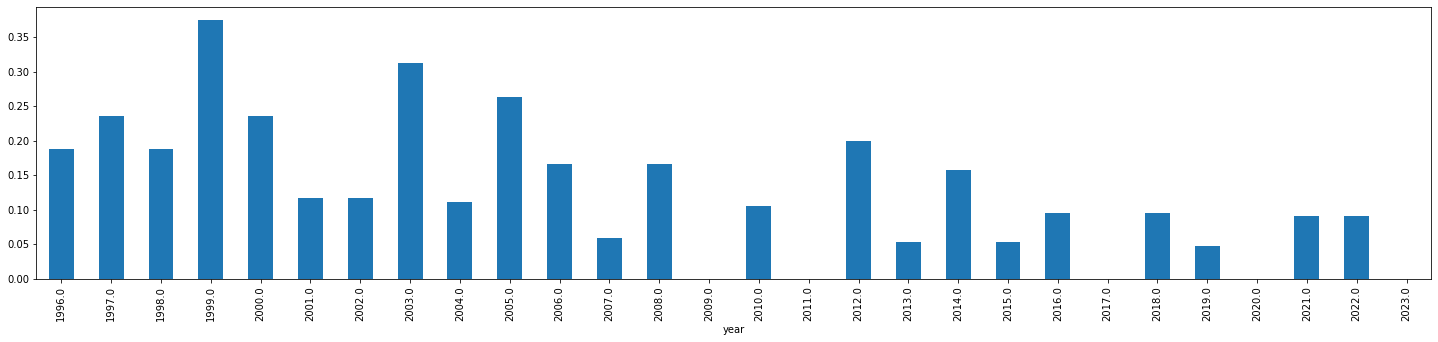

In [21]:
(fromzerotohero.groupby('year')['raceId'].nunique() / results[results['year'] >= 1996].groupby('year')['raceId'].nunique()).plot.bar(figsize=(25,5))

## Leading driver changes

In [22]:
raceids = results['raceId'].drop_duplicates().to_list()

In [23]:
def get_leader_changes(id):
    wdf = laps[laps['raceId'] == id]
    if len(wdf) == 0:
        return None
    else:
        wdf = wdf[wdf['position'] == 1].sort_values(by='lap')
        leaders = wdf['name'].to_list()
        dummy_leader = None
        count = -1
        for l in leaders:
            if l == dummy_leader:
                pass
            else:
                dummy_leader = l
                count = count + 1
        return count

In [24]:
leaderChanges = {}
for r in raceids:
    leaderChanges[r] = get_leader_changes(r)
leaderChanges = pd.DataFrame.from_dict([leaderChanges]).transpose()
leaderChanges['raceId'] = leaderChanges.index
leaderChanges = leaderChanges.rename(columns={0 : 'leaderChanges'})

In [25]:
leaderChanges

,leaderChanges,raceId
18.0,4,18.0
19.0,5,19.0
20.0,3,20.0
21.0,3,21.0
22.0,7,22.0
...,...,...
800.0,None,800.0
1118.0,None,1118.0
1120.0,None,1120.0
1119.0,None,1119.0


In [26]:
results = results.merge(leaderChanges, on='raceId')

<Axes: xlabel='year'>

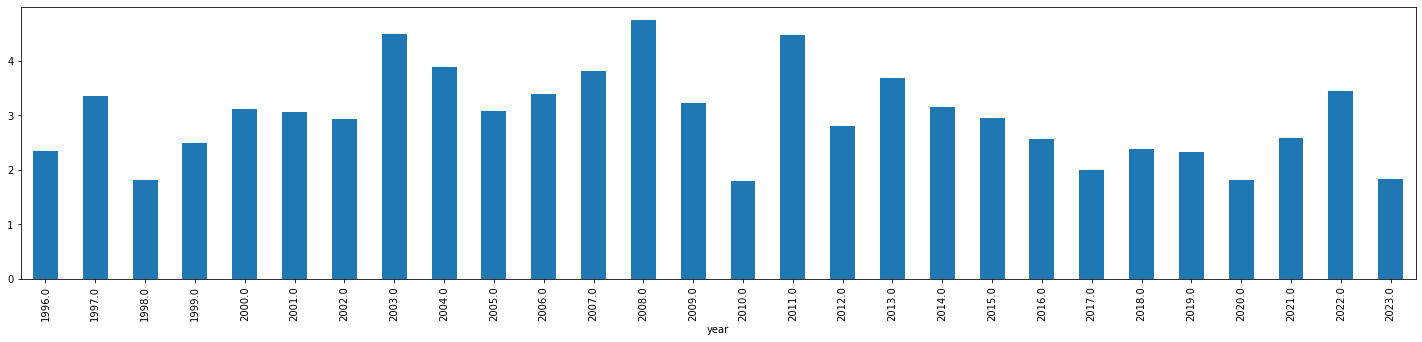

In [27]:
results[results['year'] >= 1996].groupby('year')['leaderChanges'].mean().plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

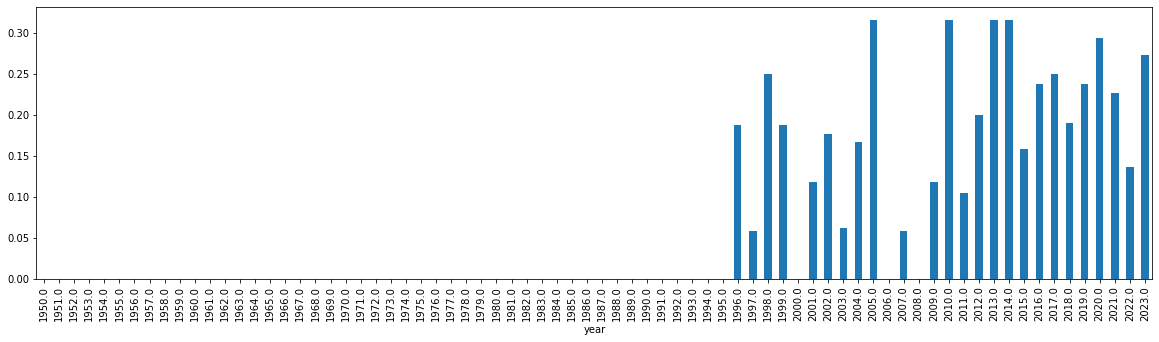

In [28]:
(results[results['leaderChanges'] == 0].groupby('year')['raceId'].nunique() / results.groupby('year')['raceId'].nunique()).plot.bar(figsize=(20,5))

<Axes: xlabel='year'>

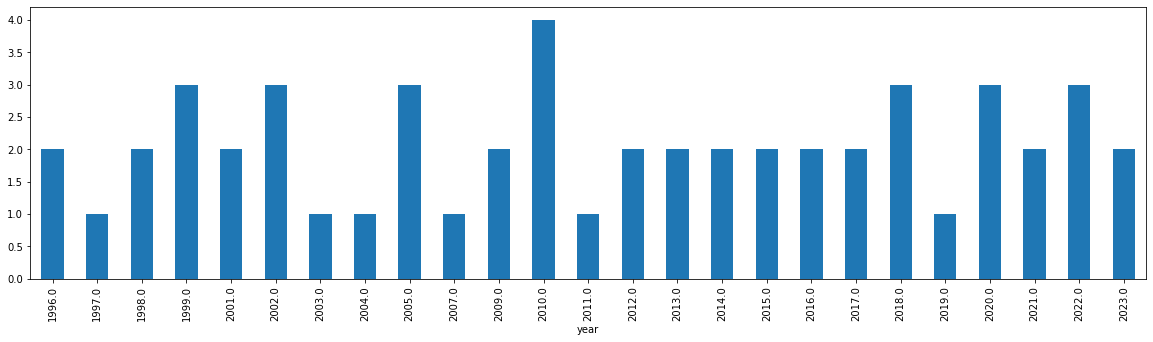

In [29]:
results[(results['leaderChanges'] == 0) & (results['position'] == 1)].groupby('year')['name'].nunique().plot.bar(figsize=(20,5))

## The gap between the deciding race and the end of the season

In [30]:
titles = pd.read_csv(os.path.join("data_raw","titles.csv"))

In [31]:
titles['year'] = titles['date'].apply(lambda x: int(x[0:4]))

In [32]:
titles

,date,champion,year
0,1950-09-03,Nino Farina,1950
1,1951-10-28,Juan Fangio,1951
2,1952-08-03,Alberto Ascari,1952
3,1953-08-23,Alberto Ascari,1953
4,1954-08-22,Juan Fangio,1954
...,...,...,...
69,2019-11-03,Lewis Hamilton,2019
70,2020-11-15,Lewis Hamilton,2020
71,2021-12-12,Max Verstappen,2021
72,2022-10-09,Max Verstappen,2022


In [33]:
races_raw = pd.read_csv(os.path.join('data_raw','races.csv'))

In [34]:
races_raw = races_raw[['year','date']]

In [35]:
seasonEnds = pd.DataFrame(races_raw.groupby('year')['date'].max())

In [36]:
seasonEnds['year'] = seasonEnds.index

In [37]:
seasonEnds['year'] = seasonEnds['year'].astype(int)
seasonEnds = seasonEnds.reset_index(drop=True)

In [38]:
seasonEnds

,date,year
0,1950-09-03,1950
1,1951-10-28,1951
2,1952-09-07,1952
3,1953-09-13,1953
4,1954-10-24,1954
...,...,...
69,2019-12-01,2019
70,2020-12-13,2020
71,2021-12-12,2021
72,2022-11-20,2022


In [39]:
titles['decidingDate'] = titles['date']
titles = titles.drop(columns = ['date'])

In [40]:
titles = titles.merge(seasonEnds, on='year')

In [41]:
titles = titles.rename(columns = {'date': 'lastDate'})

In [42]:
titles['decidingDate'] = pd.to_datetime(titles['decidingDate'])

In [43]:
titles['lastDate'] = pd.to_datetime(titles['lastDate'])

In [44]:
titles

,champion,year,decidingDate,lastDate
0,Nino Farina,1950,1950-09-03,1950-09-03
1,Juan Fangio,1951,1951-10-28,1951-10-28
2,Alberto Ascari,1952,1952-08-03,1952-09-07
3,Alberto Ascari,1953,1953-08-23,1953-09-13
4,Juan Fangio,1954,1954-08-22,1954-10-24
...,...,...,...,...
69,Lewis Hamilton,2019,2019-11-03,2019-12-01
70,Lewis Hamilton,2020,2020-11-15,2020-12-13
71,Max Verstappen,2021,2021-12-12,2021-12-12
72,Max Verstappen,2022,2022-10-09,2022-11-20


In [45]:
titles['gap'] = titles['lastDate'] - titles['decidingDate']

In [46]:
titles['gap']

0     0 days
1     0 days
2    35 days
3    21 days
4    63 days
       ...  
69   28 days
70   28 days
71    0 days
72   42 days
73   50 days
Name: gap, Length: 74, dtype: timedelta64[ns]

In [47]:
titles.sort_values(by=['gap','year']).head(35)

,champion,year,decidingDate,lastDate,gap
0,Nino Farina,1950,1950-09-03,1950-09-03,0 days
1,Juan Fangio,1951,1951-10-28,1951-10-28,0 days
6,Juan Fangio,1956,1956-09-02,1956-09-02,0 days
8,Mike Hawthorn,1958,1958-10-19,1958-10-19,0 days
9,Jack Brabham,1959,1959-12-12,1959-12-12,0 days
12,Graham Hill,1962,1962-12-29,1962-12-29,0 days
14,John Surtees,1964,1964-10-25,1964-10-25,0 days
17,Denny Hulme,1967,1967-10-22,1967-10-22,0 days
18,Graham Hill,1968,1968-11-03,1968-11-03,0 days
24,Emerson Fittipaldi,1974,1974-10-06,1974-10-06,0 days


In [48]:
titles.sort_values(by=['gap','year']).tail(35)

,champion,year,decidingDate,lastDate,gap
20,Jochen Rindt,1970,1970-10-04,1970-10-25,21 days
27,Niki Lauda,1977,1977-10-02,1977-10-23,21 days
45,Michael Schumacher,1995,1995-10-22,1995-11-12,21 days
55,Fernando Alonso,2005,2005-09-25,2005-10-16,21 days
11,Phil Hill,1961,1961-09-10,1961-10-08,28 days
22,Emerson Fittipaldi,1972,1972-09-10,1972-10-08,28 days
23,Jackie Stewart,1973,1973-09-09,1973-10-07,28 days
25,Niki Lauda,1975,1975-09-07,1975-10-05,28 days
28,Mario Andretti,1978,1978-09-10,1978-10-08,28 days
29,Jody Scheckter,1979,1979-09-09,1979-10-07,28 days


In [49]:
titles.index = titles['year']

In [50]:
titles['days'] = titles['gap'].dt.days

<Axes: xlabel='year'>

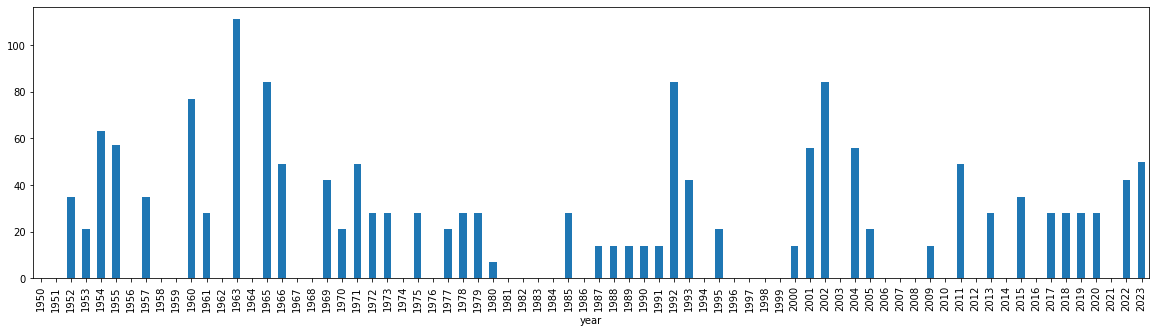

In [51]:
titles['days'].plot.bar(figsize=(20,5))

In [52]:
races_raw['date'] = pd.to_datetime(races_raw['date'])

In [53]:
races_raw['date']

0      2009-03-29
1      2009-04-05
2      2009-04-19
3      2009-04-26
4      2009-05-10
          ...    
1096   2023-10-22
1097   2023-10-29
1098   2023-11-05
1099   2023-11-19
1100   2023-11-26
Name: date, Length: 1101, dtype: datetime64[ns]

In [54]:
def howmanyleft(date1, date2):
    w2df = races_raw[(races_raw['date'] > pd.to_datetime(date1)) & (races_raw['date'] <= pd.to_datetime(date2))]
    return len(w2df['date'].drop_duplicates())

In [55]:
titles['racesLeft'] = titles.apply(lambda row: howmanyleft(row['decidingDate'], row['lastDate']), axis = 1)

<Axes: xlabel='year'>

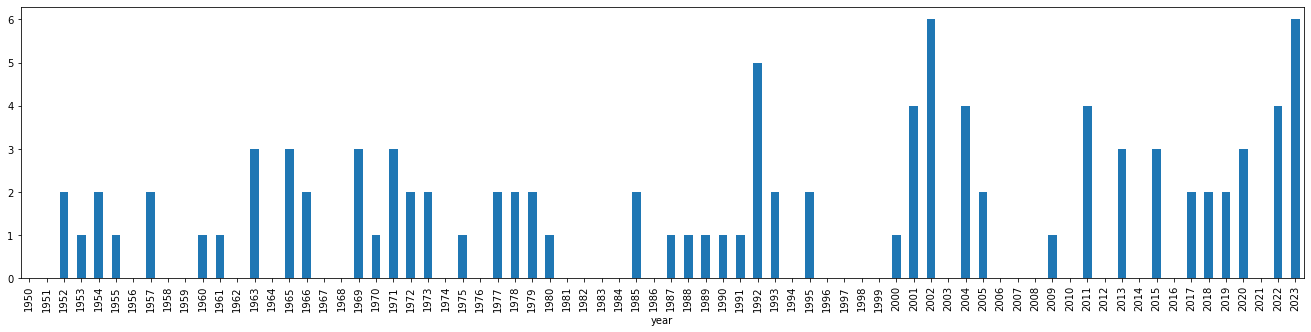

In [56]:
titles['racesLeft'].plot.bar(figsize=(23,5))

## Maiden wins, podiums and points

In [57]:
years = results['year'].sort_values().drop_duplicates().to_list()

<Axes: xlabel='year'>

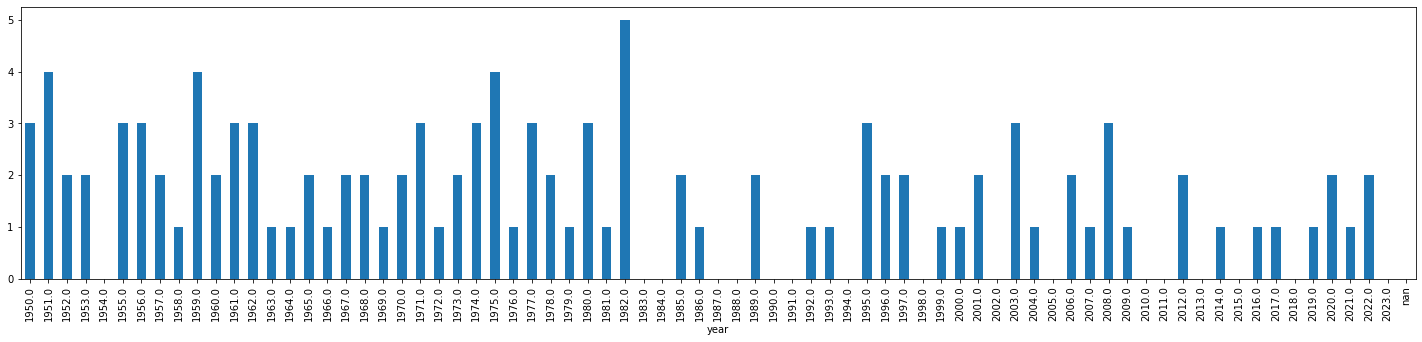

In [58]:
pd.DataFrame(results[results['position'] == 1].groupby('name')['year'].min()).groupby('year').size().reindex(index=years).plot.bar(figsize=(25,5))

In [59]:
results[results['position'] == 1].groupby('name')['year'].min().nlargest(10)

name
Carlos Sainz        2022.0
George Russell      2022.0
Esteban Ocon        2021.0
Pierre Gasly        2020.0
Sergio Pérez        2020.0
Charles Leclerc     2019.0
Valtteri Bottas     2017.0
Max Verstappen      2016.0
Daniel Ricciardo    2014.0
Nico Rosberg        2012.0
Name: year, dtype: float64

<Axes: xlabel='year'>

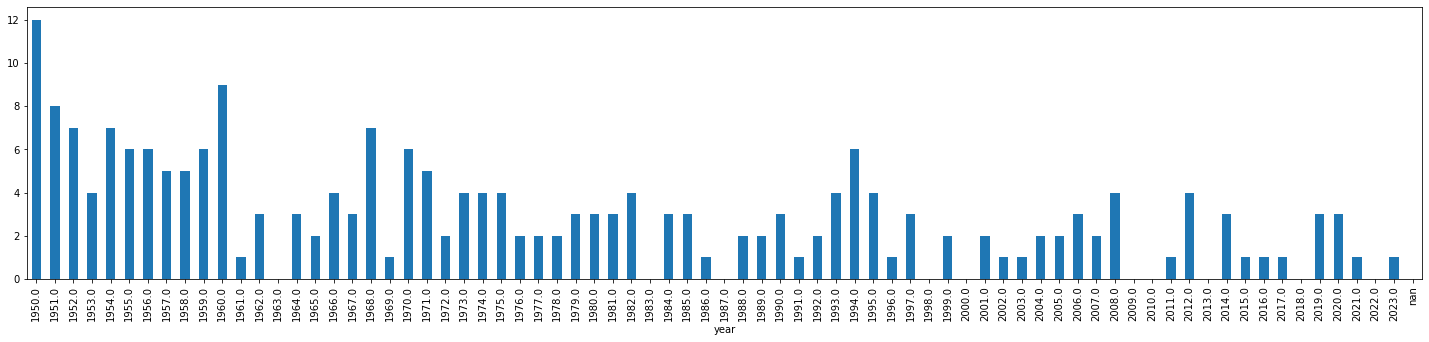

In [60]:
pd.DataFrame(results[results['position'] <= 3].groupby('name')['year'].min()).groupby('year').size().reindex(index=years).plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

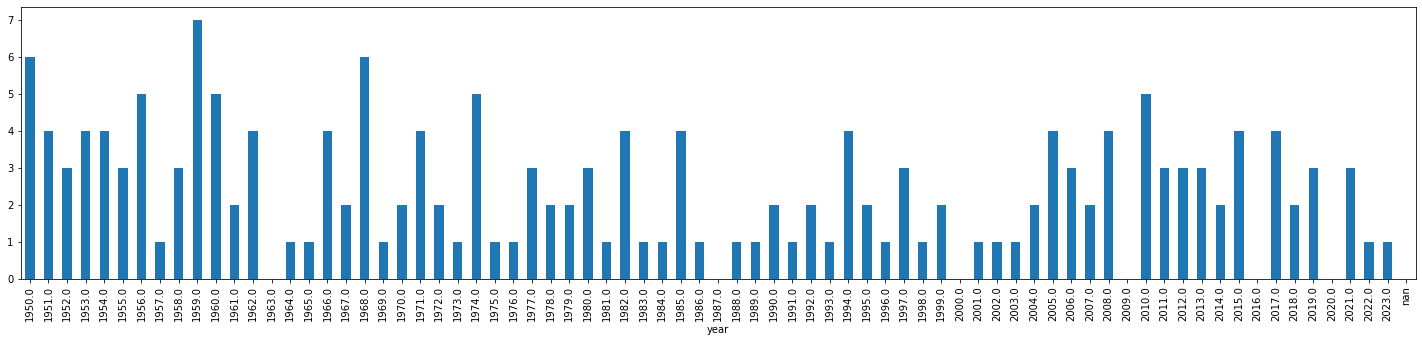

In [61]:
pd.DataFrame(results[results['points'] >= 6].groupby('name')['year'].min()).groupby('year').size().reindex(index=years).plot.bar(figsize=(25,5))

In [133]:
results[results['driverId'].isnull()]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,location,country,gp,status,constructor,constructorNationality,constructorRef,name,age,leaderChanges
26220,NaN,1118.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,São Paulo,Brazil,São Paulo Grand Prix,None,None,None,None,None,NaN,None
26221,NaN,1120.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,Abu Dhabi,UAE,Abu Dhabi Grand Prix,None,None,None,None,None,NaN,None
26222,NaN,1119.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,Las Vegas,United States,Las Vegas Grand Prix,None,None,None,None,None,NaN,None
26223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,None,None,None,+49 Laps,None,None,None,None,NaN,NaN
26224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,None,None,None,+38 Laps,None,None,None,None,NaN,NaN
26225,NaN,NaN,NaN,88.0,NaN,NaN,NaN,None,NaN,NaN,...,None,None,None,None,Eagle,American,eagle,None,NaN,NaN


In [130]:
results[results['year'].isnull()]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,location,country,gp,status,constructor,constructorNationality,constructorRef,name,age,leaderChanges
26223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,None,None,None,+49 Laps,None,None,None,None,NaN,NaN
26224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,...,None,None,None,+38 Laps,None,None,None,None,NaN,NaN
26225,NaN,NaN,NaN,88.0,NaN,NaN,NaN,None,NaN,NaN,...,None,None,None,None,Eagle,American,eagle,None,NaN,NaN


<Axes: xlabel='year'>

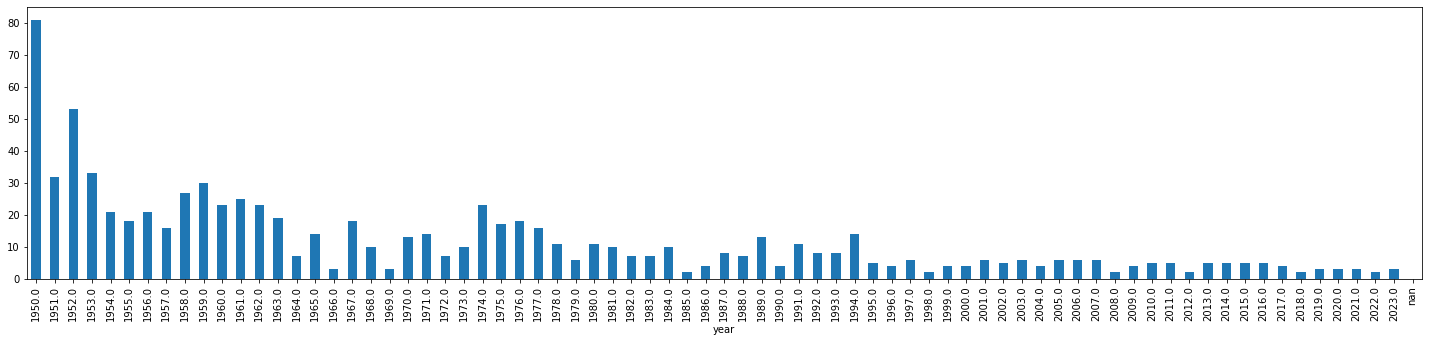

In [62]:
pd.DataFrame(results[results['points'] >= 0].groupby('name')['year'].min()).groupby('year').size().reindex(index=years).plot.bar(figsize=(25,5))

In [63]:
pd.DataFrame(results[results['points'] >= 0].groupby('name')['year'].min()).groupby('year').size().reindex(index=years)

year
1950.0    81.0
1951.0    32.0
1952.0    53.0
1953.0    33.0
1954.0    21.0
          ... 
2020.0     3.0
2021.0     3.0
2022.0     2.0
2023.0     3.0
NaN        NaN
Length: 75, dtype: float64

In [64]:
pd.DataFrame(results[results['points'] >= 0].groupby('name')['year'].min()).sort_values(by='year')

,year
name,
Lee Wallard,1950.0
Jimmy Davies,1950.0
Jim Rathmann,1950.0
Jerry Hoyt,1950.0
Bill Schindler,1950.0
...,...
Nyck de Vries,2022.0
Guanyu Zhou,2022.0
Logan Sargeant,2023.0


## Outstanding rookies

In [65]:
wpoints = {}
for y in range(1950, 2024):
    if y <= 1960:
        wpoints[y] = 8
    if y >= 1961 and y <= 1990:
        wpoints[y] = 9
    if y >= 1991 and y <= 2009:
        wpoints[y] = 10
    if y >= 2010:
        wpoints[y] = 25

In [66]:
winningpoints = pd.DataFrame([wpoints]).transpose().rename(columns={0:'wpoints'})
winningpoints['year'] = winningpoints.index
winningpoints = winningpoints.reset_index(drop=True)

In [67]:
racesperseason = pd.DataFrame(results.groupby('year')['raceId'].nunique())

In [68]:
racesperseason['year'] = racesperseason.index.astype(int)
racesperseason = racesperseason.reset_index(drop=True)

In [69]:
racesperseason = racesperseason.merge(winningpoints, on='year')

In [70]:
racesperseason

,raceId,year,wpoints
0,7,1950,8
1,8,1951,8
2,8,1952,8
3,9,1953,8
4,9,1954,8
...,...,...,...
69,21,2019,25
70,17,2020,25
71,22,2021,25
72,22,2022,25


In [71]:
racesperseason['possiblePoints'] = racesperseason['raceId'] * racesperseason['wpoints']

In [72]:
racesperseason

,raceId,year,wpoints,possiblePoints
0,7,1950,8,56
1,8,1951,8,64
2,8,1952,8,64
3,9,1953,8,72
4,9,1954,8,72
...,...,...,...,...
69,21,2019,25,525
70,17,2020,25,425
71,22,2021,25,550
72,22,2022,25,550


In [73]:
rookies = pd.DataFrame(results.groupby('name')['year'].min())
rookies['name'] = rookies.index
rookies = rookies.reset_index(drop = True)

In [74]:
rookies

,year,name
0,1952.0,Adolf Brudes
1,1953.0,Adolfo Cruz
2,2007.0,Adrian Sutil
3,1987.0,Adrián Campos
4,1988.0,Aguri Suzuki
...,...,...
853,2003.0,Zsolt Baumgartner
854,1952.0,Élie Bayol
855,1989.0,Éric Bernard
856,1991.0,Érik Comas


In [75]:
def points(year, name):
    return results[(results['year'] == year) & (results['name'] == name)]['points'].sum()

In [76]:
rookies = rookies.merge(racesperseason[['year','possiblePoints']], on='year')

In [77]:
rookies['pointsWon'] = rookies.apply(lambda row: points(row['year'], row['name']), axis = 1)

In [78]:
rookies['ratio'] = rookies['pointsWon'] / rookies['possiblePoints']

<Axes: xlabel='year'>

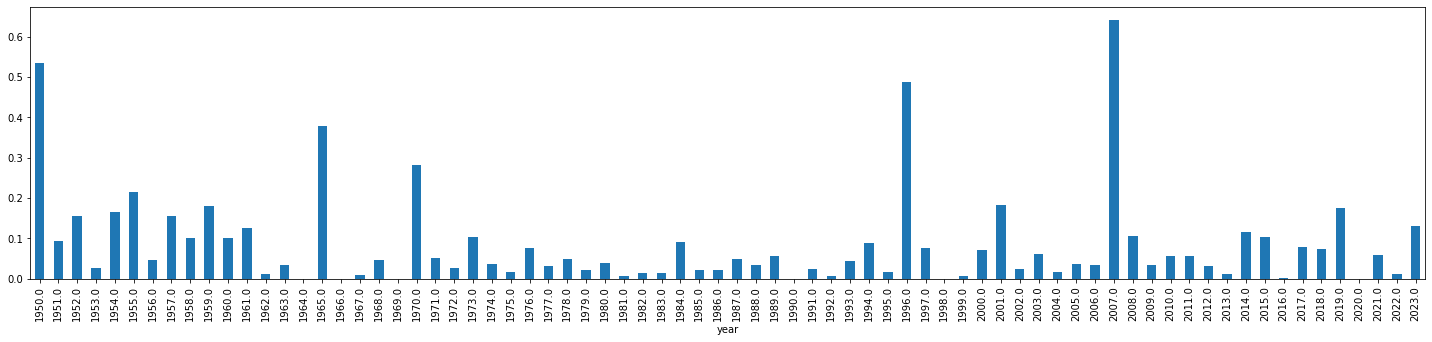

In [79]:
rookies.groupby('year')['ratio'].max().plot.bar(figsize=(25,5))

In [80]:
rookies.sort_values(by='ratio',ascending=False).head(20)

,year,name,possiblePoints,pointsWon,ratio
89,2007.0,Lewis Hamilton,170,109.0,0.641176
299,1950.0,Nino Farina,56,30.0,0.535714
292,1950.0,Luigi Fagioli,56,28.0,0.500000
822,1996.0,Jacques Villeneuve,160,78.0,0.487500
287,1950.0,Juan Fangio,56,27.0,0.482143
211,1965.0,Jackie Stewart,90,34.0,0.377778
439,1970.0,Clay Regazzoni,117,33.0,0.282051
291,1950.0,Louis Rosier,56,13.0,0.232143
113,1955.0,Eugenio Castellotti,56,12.0,0.214286
242,1950.0,Alberto Ascari,56,11.0,0.196429


In [81]:
rookies[rookies['year'] > 1950][['year','name','ratio']].sort_values(by='ratio',ascending=False).head(50).reset_index()

,index,year,name,ratio
0,89,2007.0,Lewis Hamilton,0.641176
1,822,1996.0,Jacques Villeneuve,0.487500
2,211,1965.0,Jackie Stewart,0.377778
3,439,1970.0,Clay Regazzoni,0.282051
4,113,1955.0,Eugenio Castellotti,0.214286
5,454,2001.0,Juan Pablo Montoya,0.182353
6,162,1959.0,Dan Gurney,0.180556
7,87,2007.0,Heikki Kovalainen,0.176471
8,457,2019.0,Alexander Albon,0.175238
9,673,1954.0,Karl Kling,0.166667


## Point differences

In [87]:
pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()

year
1950.0     30.00
1951.0     37.00
1952.0     53.50
1953.0     46.50
1954.0     57.14
           ...  
2019.0    413.00
2020.0    347.00
2021.0    388.50
2022.0    433.00
2023.0    454.00
Name: points, Length: 74, dtype: float64

In [96]:
pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[2])

year
1950.0     27.00
1951.0     27.00
1952.0     22.00
1953.0     29.50
1954.0     24.64
           ...  
2019.0    278.00
2020.0    214.00
2021.0    219.00
2022.0    291.00
2023.0    205.00
Name: points, Length: 74, dtype: float64

<Axes: xlabel='year'>

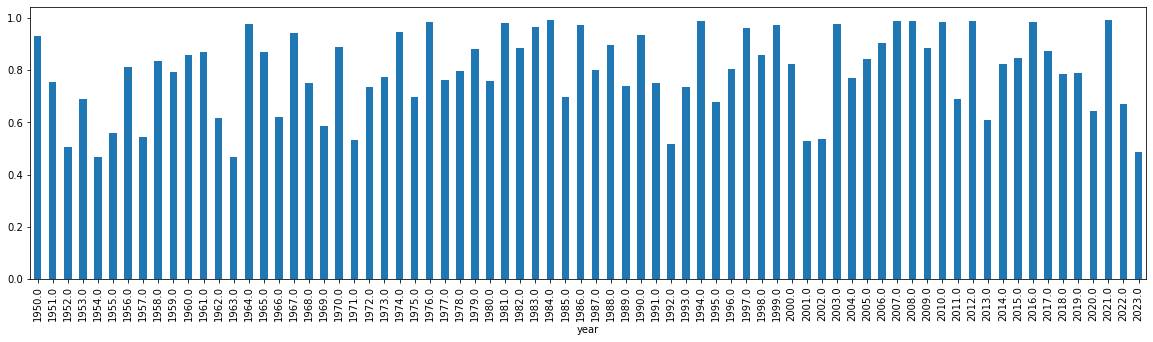

In [101]:
(pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()).plot.bar(figsize=(20,5))

<Axes: xlabel='year'>

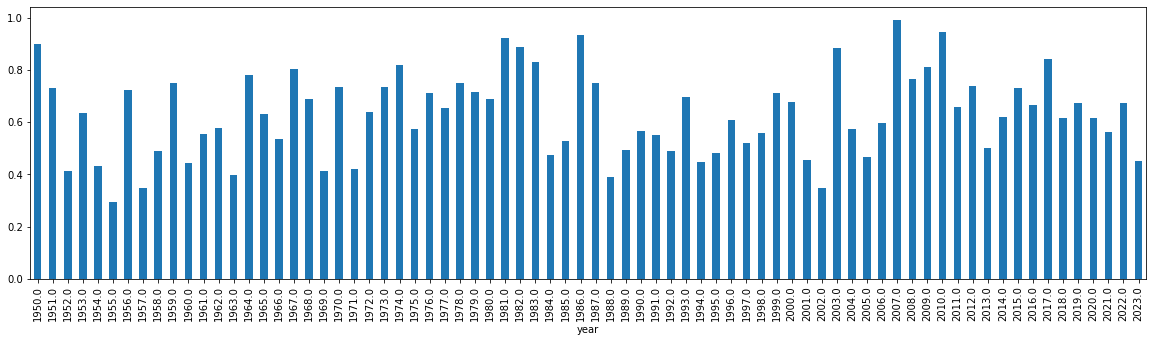

In [98]:
(pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[2]) / pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()).plot.bar(figsize=(20,5))

<Axes: xlabel='year'>

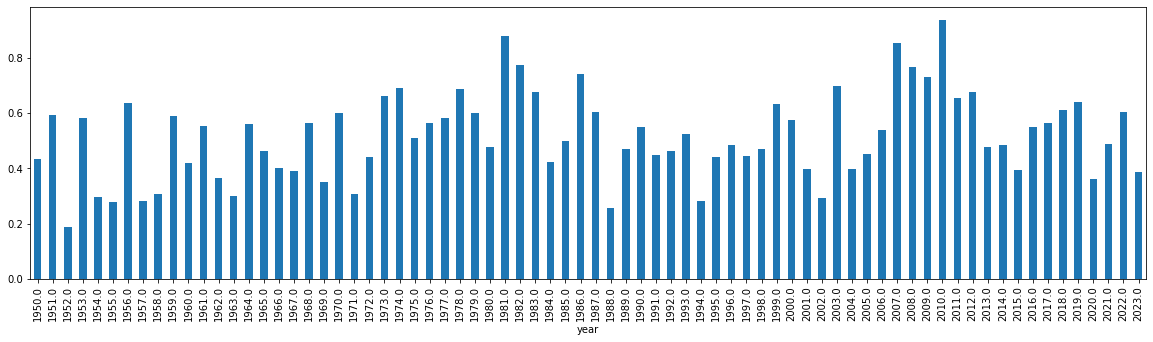

In [100]:
(pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest().iloc[3]) / pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()).plot.bar(figsize=(20,5))

<Axes: xlabel='year'>

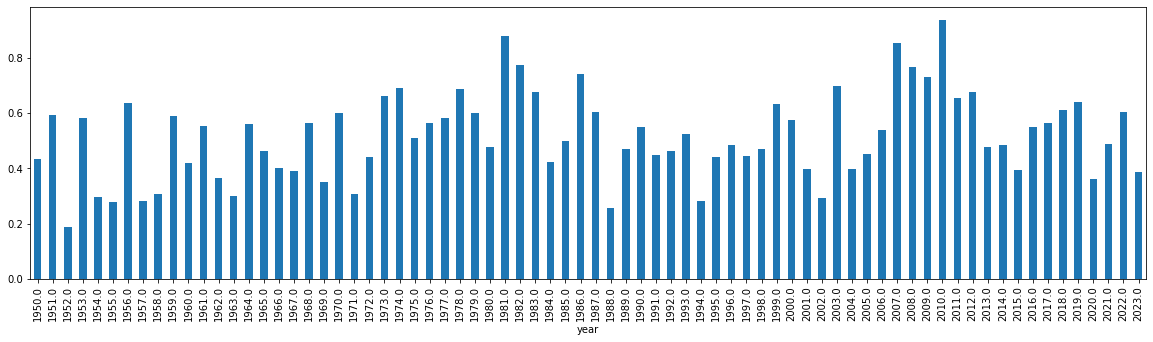

In [102]:
(pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].apply(lambda x: x.nlargest().iloc[3]) / pd.DataFrame(results.groupby(['year','name'])['points'].sum()).sort_values(by=['year','points'], ascending=[True, False]).groupby('year')['points'].max()).plot.bar(figsize=(20,5))

In [122]:
pd.DataFrame((pd.DataFrame(results.groupby(['year','constructor','name'])['points'].sum())).sort_values(by=['year','points'], ascending=[True, False]).groupby(['year','constructor'])['points'].max()).sort_values(by=['year','points'], ascending=[True,False]).tail(20)

points
year   constructor           
2022.0 Red Bull         433.0
       Ferrari          291.0
       Mercedes         262.0
       McLaren          116.0
       Alpine F1 Team    89.0
       Alfa Romeo        47.0
       Aston Martin      37.0
       AlphaTauri        23.0
       Haas F1 Team      21.0
       Williams           4.0
2023.0 Red Bull         454.0
       Mercedes         205.0
       Aston Martin     175.0
       Ferrari          162.0
       McLaren          155.0
       Alpine F1 Team    48.0
       Williams          25.0
       Alfa Romeo        10.0
       AlphaTauri         8.0
       Haas F1 Team       6.0

In [136]:
constructorChamps = pd.DataFrame((pd.DataFrame(results.groupby(['year','constructor','name'])['points'].sum())).sort_values(by=['year','points'], ascending=[True, False]).groupby(['year','constructor'])['points'].max()).reset_index()

In [138]:
constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[0])

year
1950.0     30.00
1951.0     37.00
1952.0     53.50
1953.0     46.50
1954.0     40.14
           ...  
2019.0    413.00
2020.0    347.00
2021.0    388.50
2022.0    433.00
2023.0    454.00
Name: points, Length: 74, dtype: float64

In [139]:
constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1])

year
1950.0     13.00
1951.0     28.00
1952.0     10.00
1953.0     29.50
1954.0     26.64
           ...  
2019.0    278.00
2020.0    214.00
2021.0    385.50
2022.0    291.00
2023.0    205.00
Name: points, Length: 74, dtype: float64

<Axes: xlabel='year'>

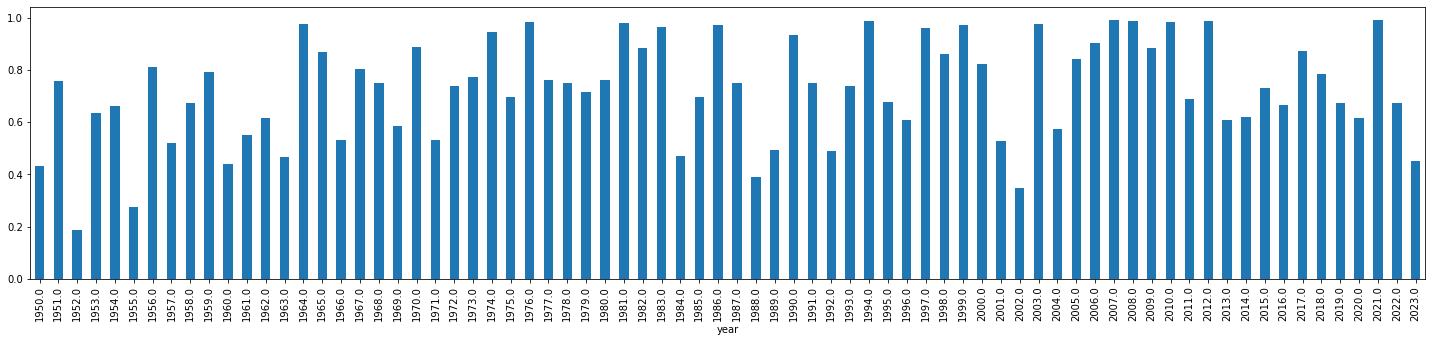

In [141]:
(constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[0])).plot.bar(figsize=(25,5))

In [145]:
newey = [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2010, 2011, 2012, 2013, 2021, 2022, 2023]

In [152]:
constructorChamps2 = constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[0])

In [156]:
constructorChamps2[constructorChamps2.index.isin(newey)].mean()

0.7791021006057075

In [146]:
(constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[0])).mean()

0.7257828170675903

In [144]:
(constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[0])).nsmallest(20)

year
1952.0    0.186916
1955.0    0.276341
2002.0    0.347222
1988.0    0.390476
1950.0    0.433333
1960.0    0.441860
2023.0    0.451542
1963.0    0.465753
1984.0    0.472222
1992.0    0.490741
1989.0    0.493827
1957.0    0.521739
2001.0    0.528455
1971.0    0.532258
1966.0    0.533333
1961.0    0.552632
2004.0    0.574324
1969.0    0.587302
1996.0    0.608247
2013.0    0.609572
Name: points, dtype: float64

In [143]:
(constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[1]) / constructorChamps.groupby('year')['points'].apply(lambda x: x.nlargest(3).iloc[0])).nlargest(10)

year
2021.0    0.992278
2007.0    0.990909
2008.0    0.989796
2012.0    0.989324
1994.0    0.989130
1976.0    0.985507
2010.0    0.984375
1981.0    0.980000
2003.0    0.978495
1964.0    0.975610
Name: points, dtype: float64

## Teams on podiums

<Axes: xlabel='year'>

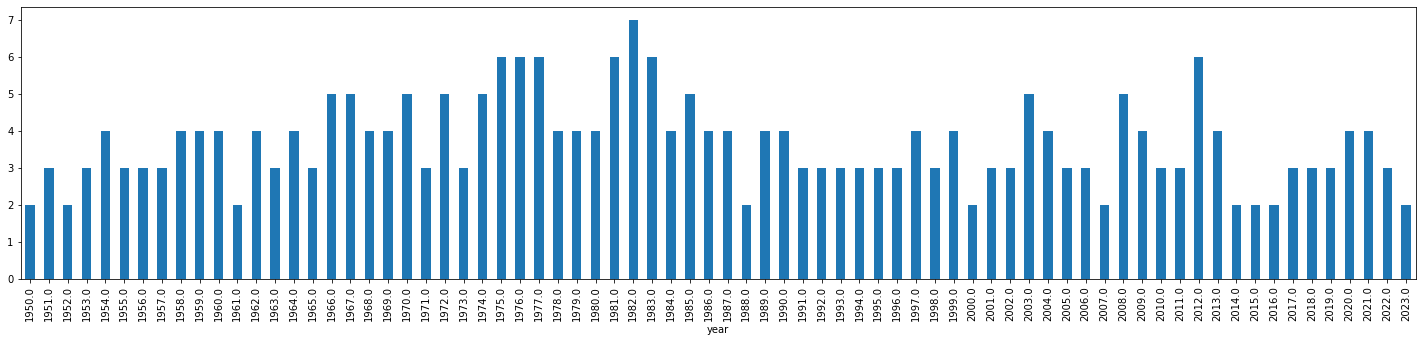

In [126]:
results[results['position'] == 1].groupby('year')['constructor'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

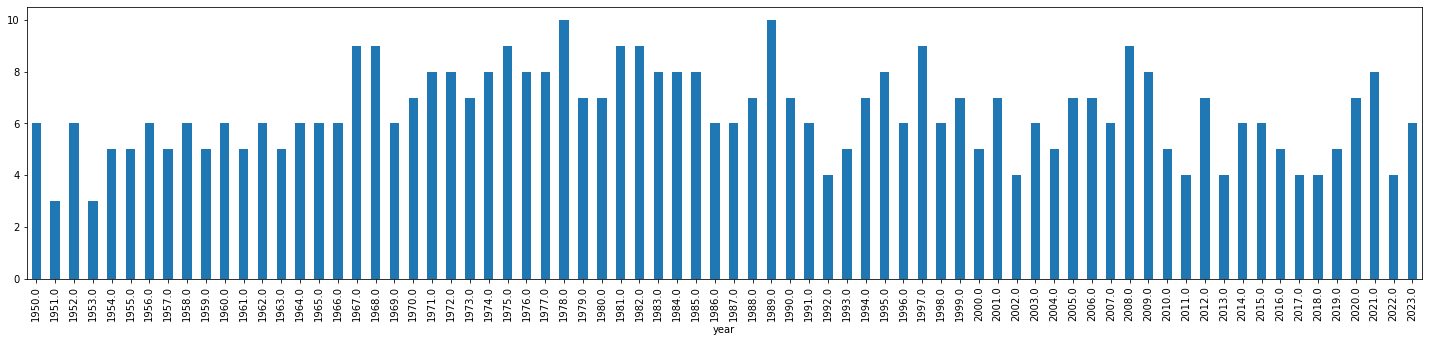

In [125]:
results[results['position'] <= 3].groupby('year')['constructor'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

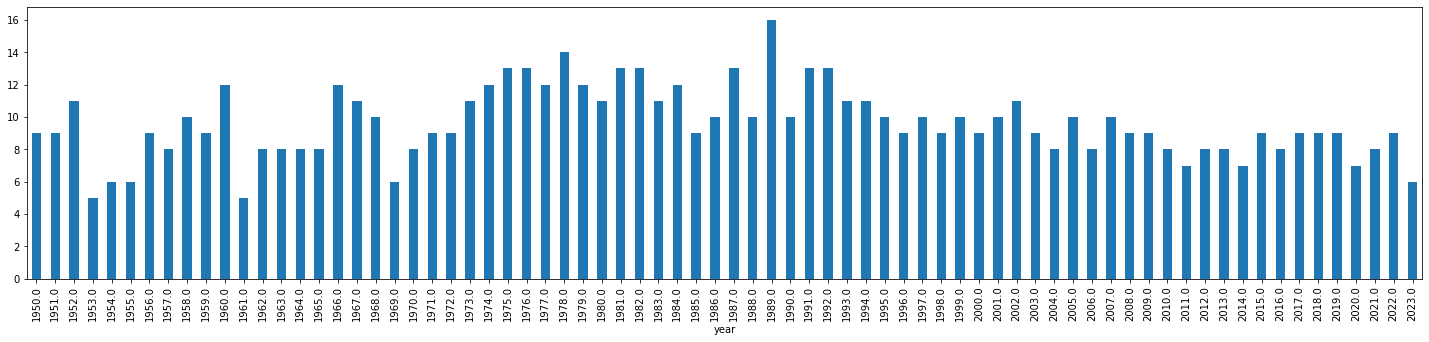

In [127]:
results[results['position'] <= 6].groupby('year')['constructor'].nunique().plot.bar(figsize=(25,5))

In [129]:
results[results['position'] <= 6].groupby('year')['constructor'].nunique().nsmallest(10)

year
1953.0    5
1961.0    5
1954.0    6
1955.0    6
1969.0    6
2023.0    6
2011.0    7
2014.0    7
2020.0    7
1957.0    8
Name: constructor, dtype: int64